In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.core.display import display

%matplotlib inline

### This table represents the average monthly precipitation for the four largest cities of Australia

In [52]:
weather = pd.read_csv('weather.csv')
weather

,Unnamed: 0,city,precip,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,Brisbane,rain,3.98,4.39,5.16,5.5,5.25,3.63,4.59,2.88,3.98,5.94,3.09,5.74
1,1,Brisbane,snow,0.00,0.00,0.00,0.0,0.00,0.00,0.50,0.57,0.00,0.00,0.00,0.00
2,2,Sydney,rain,3.75,4.39,3.20,5.5,5.30,3.63,4.59,3.50,3.98,3.30,3.10,4.70
3,3,Sydney,snow,0.00,1.10,2.10,1.4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,4,Melbourne,rain,4.91,1.30,5.16,3.4,5.60,4.50,4.59,2.10,5.40,1.20,4.50,5.50
5,5,Melbourne,snow,0.00,0.00,0.00,0.0,0.00,1.30,2.30,1.60,1.10,0.00,0.00,0.00
6,6,Hobart,rain,4.91,4.84,3.99,4.1,4.05,4.91,3.48,4.04,3.28,5.00,3.09,4.90
7,7,Hobart,snow,1.20,1.10,0.20,0.3,0.50,1.50,2.10,2.30,1.40,1.60,0.00,0.00


### Average monthly rainfall by city

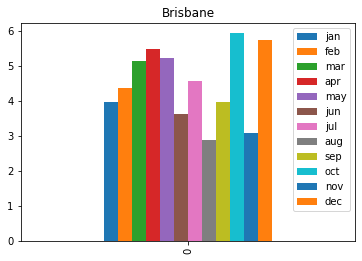

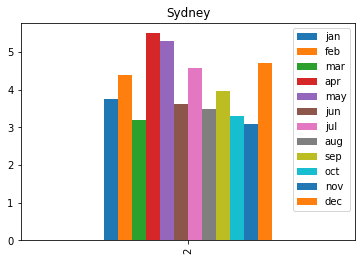

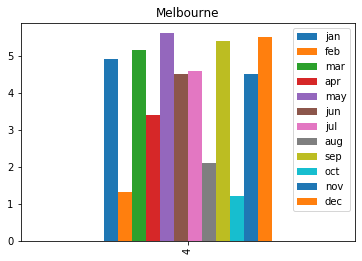

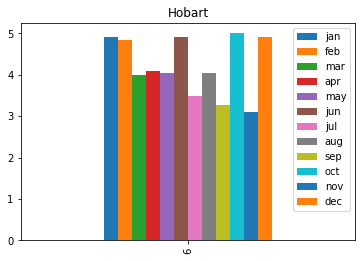

In [53]:
average_rain = [
    weather[(weather.city == city) & (weather.precip == 'rain')][weather.columns[2:]]
    for city in weather.city.unique()
]

for (idx, city) in enumerate(weather.city.unique()):
    average_rain[idx].plot.bar(title = city)

### Most total rainfall per month

In [54]:
weather[weather.precip == 'rain'].style.highlight_max()

,Unnamed: 0,city,precip,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,0,Brisbane,rain,3.980000,4.390000,5.160000,5.500000,5.250000,3.630000,4.590000,2.880000,3.980000,5.940000,3.090000,5.740000
2,2,Sydney,rain,3.750000,4.390000,3.200000,5.500000,5.300000,3.630000,4.590000,3.500000,3.980000,3.300000,3.100000,4.700000
4,4,Melbourne,rain,4.910000,1.300000,5.160000,3.400000,5.600000,4.500000,4.590000,2.100000,5.400000,1.200000,4.500000,5.500000
6,6,Hobart,rain,4.910000,4.840000,3.990000,4.100000,4.050000,4.910000,3.480000,4.040000,3.280000,5.000000,3.090000,4.900000


### Months receiving snowfall

In [55]:
def highlight_snow(snow):
    return 'color: {0}'.format('black' if snow == 0.0 else 'blue')

In [56]:
weather[weather.precip == 'snow'].style.applymap(highlight_snow, subset = weather.columns[2:0])

,Unnamed: 0,city,precip,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
1,1,Brisbane,snow,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.570000,0.000000,0.000000,0.000000,0.000000
3,3,Sydney,snow,0.000000,1.100000,2.100000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,Melbourne,snow,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,2.300000,1.600000,1.100000,0.000000,0.000000,0.000000
7,7,Hobart,snow,1.200000,1.100000,0.200000,0.300000,0.500000,1.500000,2.100000,2.300000,1.400000,1.600000,0.000000,0.000000


In [57]:
def query_weather(city):
    display(weather[weather.city == city])
    
def observer(bunch):
    query_weather(bunch.new)
    
dropdown = widgets.Dropdown(options = weather.city.unique())
dropdown.observe(observer, names = 'value')
display(dropdown)

Dropdown(options=('Brisbane', 'Sydney', 'Melbourne', 'Hobart'), value='Brisbane')

#### See the [Jupyetr Widgets Documentation](https://ipywidgets.readthedocs.io/en/latest/index.html) to setup instructions if you get error in this part (above)